# Data Processing and Cleaning

In [8]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from matplotlib.cm import ScalarMappable

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

# creating array of year values for later querying
years = df.index.values

# creating mean columns for each year
for i in df.index.values:
    df.at[i,'mean'] = df.loc[i].mean()
    
# creating std. error (std. dev. of means) columns for each year
for i in df.index.values:
    df.at[i,'se_mean'] = df.loc[i].std()/math.sqrt(df.loc[i]['mean'])

# confidence intervals reflect 95% confidence intervals for means
for i in df.index.values:
    df.at[i,'CI95'] = (1.96 * (df.loc[i].std()/(math.sqrt(len(df.loc[i])-2)))) 

# Create Interactive Bar Chart

<IPython.core.display.Javascript object>


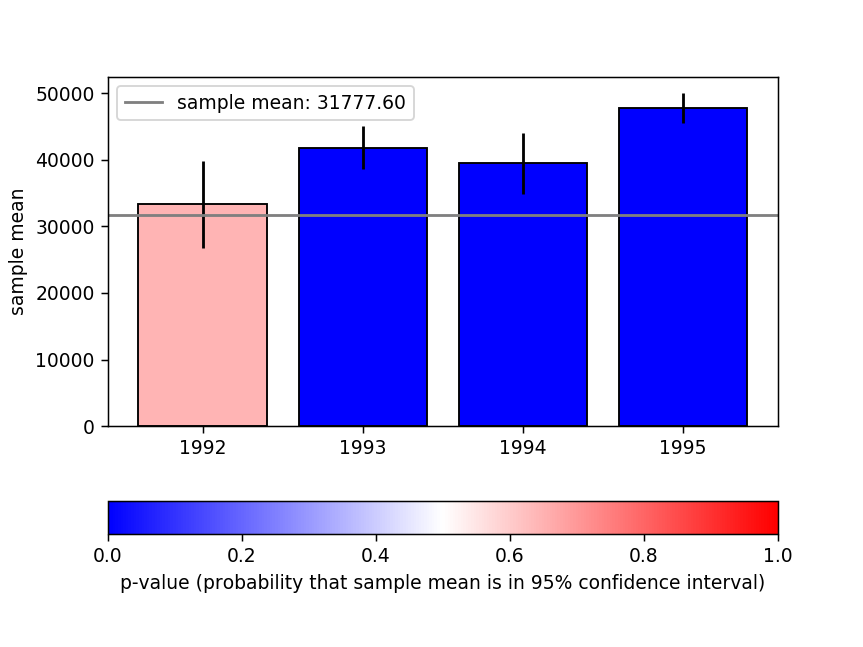

7

In [12]:
# create interactive plot

plt.figure()

def interactive_errorplot():    
    plt.bar(years, df['mean'], yerr = df['CI95'], edgecolor = 'black', color = 'grey')
    plt.xticks(years)
    plt.ylabel('sample mean')
    
   
    plt.show()

def errorplot_easy(ynum: float):
    pvals = [stats.ttest_1samp(a=df.loc[i], popmean=ynum).pvalue for i in years]
    
    plt.clf()
    plt.axhline(ynum, color='grey', label='sample mean: {:.2f}'.format(ynum))
    
    my_cmap = plt.cm.get_cmap('bwr')
    colors = my_cmap(pvals)
    
    plt.bar(years, df['mean'], yerr = df['CI95'], edgecolor = 'black', color = colors)
    
    sm = ScalarMappable(cmap = my_cmap)
    sm.set_array([])

    plt.colorbar(sm, orientation="horizontal", label='p-value (probability that sample mean is in 95% confidence interval)')
    plt.xticks(years)
    plt.ylabel('sample mean')
    
    plt.legend()

def onclick(event):
    plt.cla()
    errorplot_easy(event.ydata)

interactive_errorplot()
plt.gcf().canvas.mpl_connect('button_press_event', onclick)